# Classification sur le statut : Malade ou non malade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving new_plant.csv to new_plant.csv


In [ ]:
import pandas as pd
import numpy as np

new_plant = pd.read_csv('new_plant.csv')

new_plant.head()

,Chemin,Espèce,Nom de la maladie,Statut
0,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
1,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
2,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
3,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
4,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True


In [ ]:
new_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70358 entries, 0 to 70357
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chemin             70358 non-null  object
 1   Espèce             70358 non-null  object
 2   Nom de la maladie  48062 non-null  object
 3   Statut             70358 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 1.7+ MB


In [ ]:
print("Nombre de statut sur Malade ou non malade :", len(new_plant['Statut'].unique()))

Nombre de statut sur Malade ou non malade : 2


In [ ]:

print("Nombre de statut sur Malade ou non malade :", list(new_plant['Statut'].unique()))

Nombre de statut sur Malade ou non malade : [True, False]


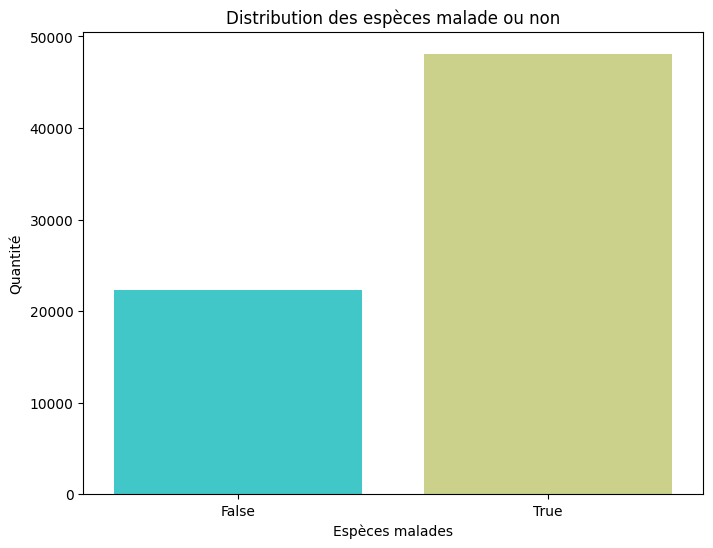

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.countplot(data=new_plant, x='Statut', palette='rainbow')
plt.title("Distribution des espèces malade ou non")
plt.xlabel("Espèces malades")
plt.ylabel("Quantité")

plt.show()

In [ ]:
import cv2
import numpy as np


new_plant = pd.read_csv('new_plant.csv')

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in zip(new_plant['Chemin'], new_plant['Statut']):
    img = cv2.imread(img_path)
    features = extract_features(img)
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Modèle Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation du Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Recherche des paramètres optimaux pour le Random Forest avec SearchCridCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 250],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',verbose=40)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.984 total time=   2.2s
[CV 2/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.982 total time=   2.8s
[CV 3/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.981 total time=   2.2s
[CV 4/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.982 total time=   2.2s
[CV 5/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.985 total time=   2.2s
[CV 1/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.989 total time=  11.1s
[CV 2/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.988 total time=  11.6s
[CV 3/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.989 total time=  11.7s
[CV 4/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.989 total time=  11.3s
[CV 5/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.990 total time=  11.4s
[CV 1/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.990 total time=  21.9s
[CV 2/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.989 total time=  22.8s
[CV 3/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.990 total time=  22.8s
[CV 4/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.989 total time=  22.5s
[CV 5/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.990 total time=  22.3s
[CV 1/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.989 total time=  55.5s
[CV 2/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.989 total time=  56.5s
[CV 3/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.990 total time=  56.8s
[CV 4/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.989 total time=  55.3s
[CV 5/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.990 total time=  59.5s
[CV 1/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.981 total time=   2.1s
[CV 2/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.978 total time=   2.1s
[CV 3/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.979 total time=   2.2s
[CV 4/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.980 total time=   2.7s
[CV 5/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.982 total time=   2.2s
[CV 1/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.986 total time=  10.9s
[CV 2/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.985 total time=  10.7s
[CV 3/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.986 total time=  10.9s
[CV 4/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.985 total time=  12.1s
[CV 5/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.987 total time=  11.0s
[CV 1/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.987 total time=  21.9s
[CV 2/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.986 total time=  22.2s
[CV 3/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.986 total time=  21.6s
[CV 4/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.986 total time=  22.0s
[CV 5/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.987 total time=  22.0s
[CV 1/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.987 total time=  54.2s
[CV 2/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.986 total time=  54.1s
[CV 3/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.986 total time=  55.3s
[CV 4/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.986 total time=  56.9s
[CV 5/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.987 total time=  55.0s
[CV 1/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.977 total time=   2.5s
[CV 2/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.974 total time=   2.2s
[CV 3/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.977 total time=   2.1s
[CV 4/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.977 total time=   2.1s
[CV 5/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.977 total time=   2.1s
[CV 1/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.983 total time=  10.7s
[CV 2/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.983 total time=  11.4s
[CV 3/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.983 total time=  10.8s
[CV 4/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.983 total time=  10.7s
[CV 5/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.984 total time=  10.8s
[CV 1/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.983 total time=  21.0s
[CV 2/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=  21.5s
[CV 3/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.983 total time=  21.3s
[CV 4/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=  20.7s
[CV 5/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.983 total time=  21.7s
[CV 1/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.984 total time=  53.1s
[CV 2/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.984 total time=  53.1s
[CV 3/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.983 total time=  54.0s
[CV 4/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.984 total time=  53.0s
[CV 5/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.983 total time=  53.6s
[CV 1/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 1/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.984 total time=   2.1s
[CV 2/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 2/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.982 total time=   2.3s
[CV 3/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 3/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.981 total time=   2.8s
[CV 4/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 4/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.982 total time=   2.2s
[CV 5/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 5/5; 13/36] END max_features=sqrt, min_samples_lea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("Meilleurs hyperparamètres :")
for param, value in best_params.items():
    print(f"{param}: {value}")

Meilleurs hyperparamètres :
max_features: auto
min_samples_leaf: 1
n_estimators: 100


In [ ]:
rf = grid_search.best_estimator_

# Entraînement du modèle
rf.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9894115974985788


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      4416
        True       0.99      0.99      0.99      9656

    accuracy                           0.99     14072
   macro avg       0.99      0.99      0.99     14072
weighted avg       0.99      0.99      0.99     14072



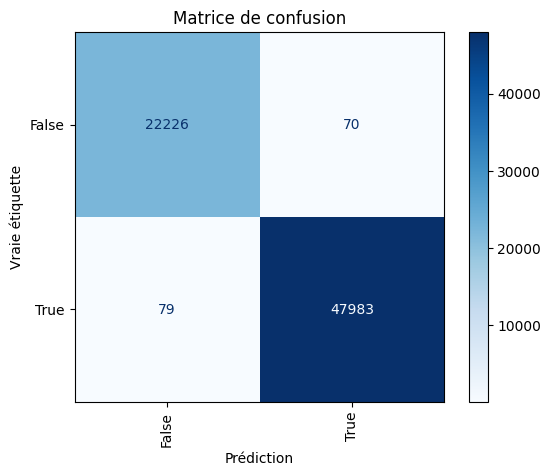

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = rf.predict(X)

cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

# Modèle Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciation de la régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement du modèle
logreg_model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = logreg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.872228538942581


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


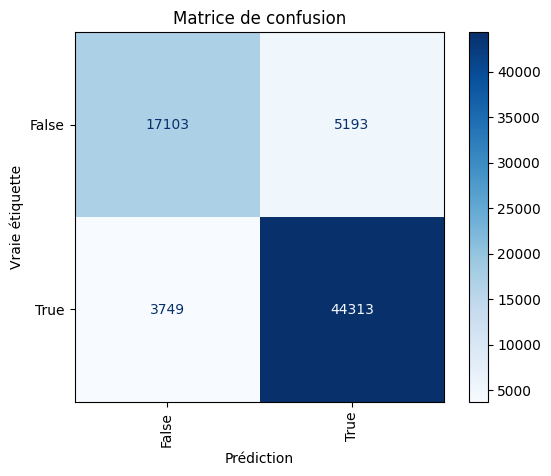

In [ ]:
y_pred = logreg_model.predict(X)

cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

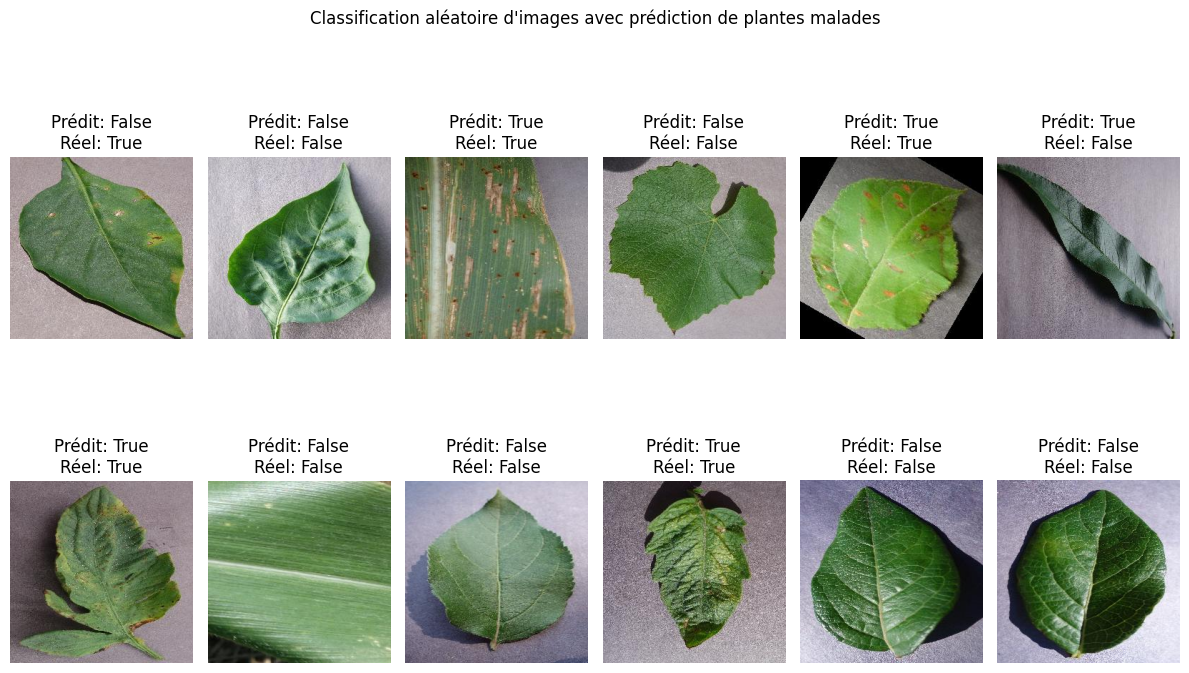

In [ ]:
import random

random_indices = random.sample(range(len(new_plant)), 12)

fig, axes = plt.subplots(2, 6, figsize=(12, 8))
fig.suptitle('Classification aléatoire d\'images avec prédiction de plantes malades')

for i, idx in enumerate(random_indices):
    img_path = new_plant['Chemin'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = logreg_model.predict([img_features])[0]

    true_label = new_plant['Statut'][idx]

    row = i // 6
    col = i % 6
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# # Rééchantillonnage de 30% du DataFrame initial

In [ ]:
import pandas as pd

new_plant_bis = new_plant.sample(frac=0.3, random_state=42)

display(new_plant_bis.head())

,Chemin,Espèce,Nom de la maladie,Statut
65017,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Yellow_Leaf_Curl_Virus,True
18057,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),NaN,False
31141,/content/drive/MyDrive/Dataset_projet/Maladie ...,Potato,NaN,False
37936,/content/drive/MyDrive/Dataset_projet/Maladie ...,Orange,Haunglongbing_(Citrus_greening),True
39633,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Leaf_blight_(Isariopsis_Leaf_Spot),True


In [ ]:
new_plant_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21107 entries, 65017 to 3813
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chemin             21107 non-null  object
 1   Espèce             21107 non-null  object
 2   Nom de la maladie  14433 non-null  object
 3   Statut             21107 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 680.2+ KB


In [ ]:
print("Nombre de statut sur Malade ou non malade :", len(new_plant['Statut'].unique()))

Nombre de statut sur Malade ou non malade : 2


In [ ]:
print("Nombre de statut sur Malade ou non malade :", list(new_plant['Statut'].unique()))

Nombre de statut sur Malade ou non malade : [True, False]


In [ ]:
new_plant_bis.head()

,Chemin,Espèce,Nom de la maladie,Statut
65017,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Yellow_Leaf_Curl_Virus,True
18057,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),None,False
31141,/content/drive/MyDrive/Dataset_projet/Maladie ...,Potato,None,False
37936,/content/drive/MyDrive/Dataset_projet/Maladie ...,Orange,Haunglongbing_(Citrus_greening),True
39633,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Leaf_blight_(Isariopsis_Leaf_Spot),True


In [ ]:
new_plant_bis['Nom de la maladie']= new_plant_bis['Nom de la maladie'].fillna(value='')

new_plant_bis['Nom de la maladie']= new_plant_bis['Nom de la maladie'].replace('', None)

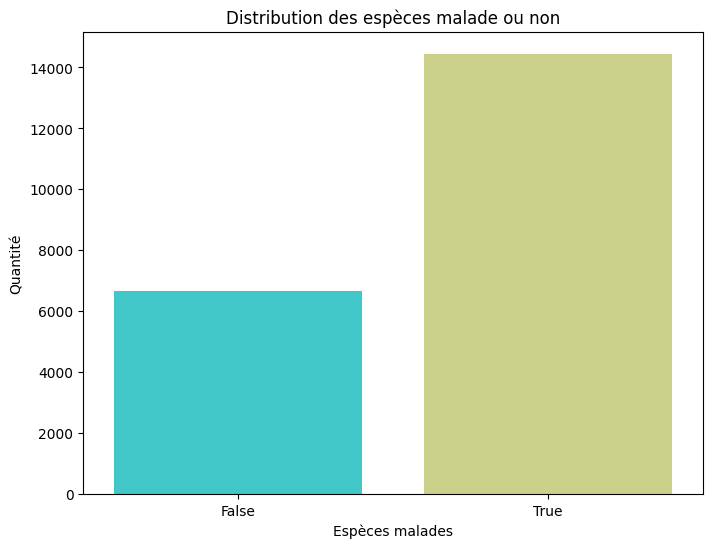

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.countplot(data=new_plant_bis, x='Statut', palette='rainbow')
plt.title("Distribution des espèces malade ou non")
plt.xlabel("Espèces malades")
plt.ylabel("Quantité")

plt.show()

In [ ]:
taille_classes = new_plant_bis['Statut'].value_counts()

print(taille_classes)

True     14433
False     6674
Name: Statut, dtype: int64


In [ ]:
import cv2
import numpy as np

# Fonction qui extrait l'histogramme des images
def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in zip(new_plant_bis['Chemin'], new_plant_bis['Statut']):
    img = cv2.imread(img_path)
    features = extract_features(img)
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

### Rééchantillonnage : Oversampling

*SMOTE sur modèle RandomForest*

In [ ]:
# Génération de nouvelles données avec SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Rééchantillonnage des données avec SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Affichage des tailles des classes équilibrées
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{False: 14433, True: 14433}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur les données équilibrées
rf.fit(X_resampled, y_resampled)

# Évaluation
accuracy = rf.score(X_test, y_test)
print("Précision:", accuracy)

Précision: 1.0


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1280
        True       1.00      1.00      1.00      2942

    accuracy                           1.00      4222
   macro avg       1.00      1.00      1.00      4222
weighted avg       1.00      1.00      1.00      4222



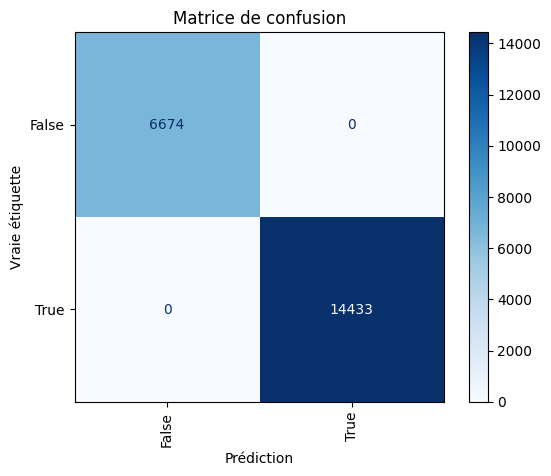

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X)

cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

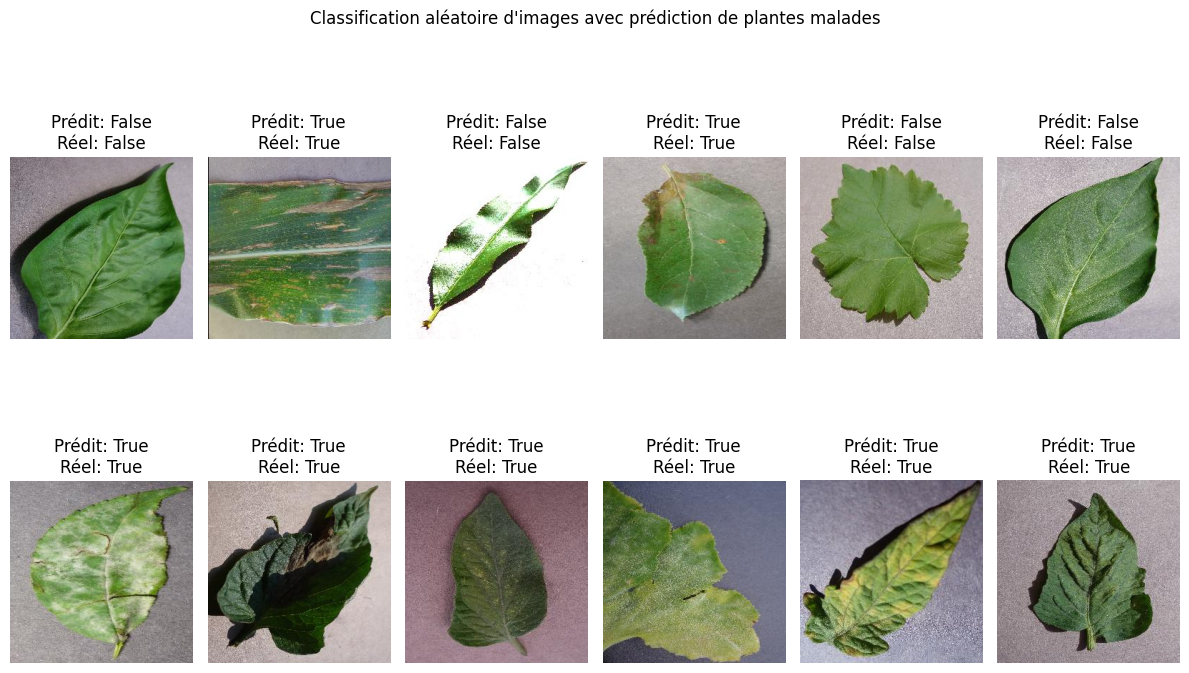

In [ ]:
import random

random_indices = random.sample(range(len(new_plant)), 12)

fig, axes = plt.subplots(2, 6, figsize=(12, 8))
fig.suptitle('Classification aléatoire d\'images avec prédiction de plantes malades')

for i, idx in enumerate(random_indices):
    img_path = new_plant['Chemin'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = rf.predict([img_features])[0]

    true_label = new_plant['Statut'][idx]

    row = i // 6
    col = i % 6
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

*Méthode SMOTE sur LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Création de SMOTE
smote = SMOTE(random_state=42)

# Génération de nouvelles données
X_resampled, y_resampled = smote.fit_resample(X, y)

# Création du modèle LogisticRegression
lr = LogisticRegression(random_state=42)

# Entraînement du modèle sur les données équilibrées
lr.fit(X_resampled, y_resampled)

# Évaluation du modèle sur les données de test
accuracy = lr.score(X_test, y_test)
print("Précision:", accuracy)

Précision: 0.8460445286594032


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


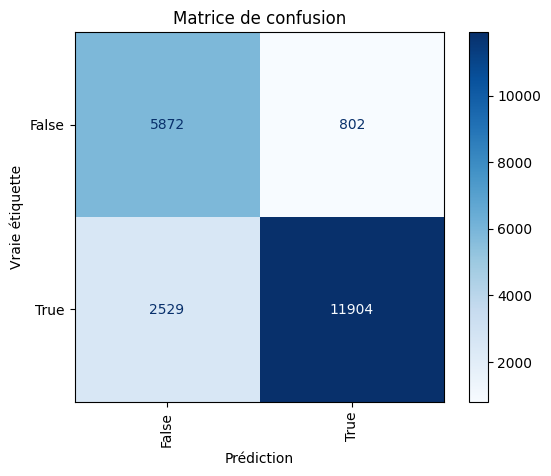

In [ ]:
y_pred = lr.predict(X)

cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

##Rééchantillonnage : Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler( random_state=42)

X_ru, y_ru = undersampler.fit_resample(X_train, y_train)


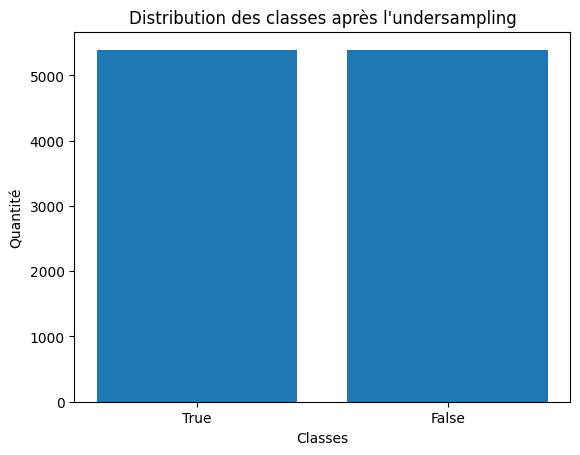

In [ ]:
num_true = sum(y_ru)
num_false = len(y_ru) - num_true

labels = ['True', 'False']
values = [num_true, num_false]

plt.bar(labels, values)
plt.xlabel('Classes')
plt.ylabel('Quantité')
plt.title('Distribution des classes après l\'undersampling')
plt.show()

In [ ]:
import numpy as np

class_counts = np.bincount(y_ru)
total_samples = np.sum(class_counts)

class_proportions = class_counts / total_samples
print(class_proportions)

[0.5 0.5]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Créer une instance de RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Entraîner le modèle avec les données rééquilibrées
rf.fit(X_ru, y_ru)



RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       False       0.91      0.99      0.95      1280
        True       0.99      0.96      0.98      2942

    accuracy                           0.97      4222
   macro avg       0.95      0.97      0.96      4222
weighted avg       0.97      0.97      0.97      4222



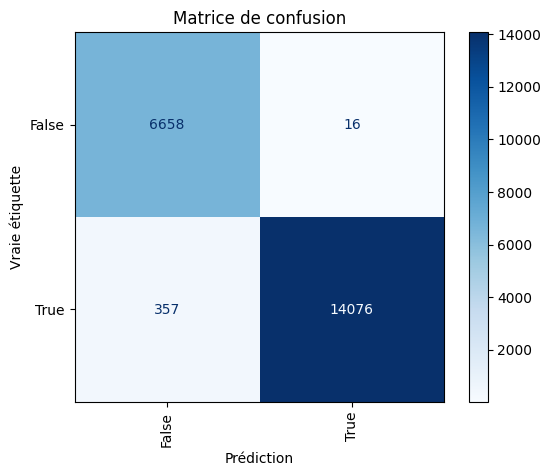

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

# Test modèle DeepLearning

In [ ]:
# Les paramètres sont bons sur la dernière couche et sur la compliation pour le statut de la maladie

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

X = np.array(X)
y = np.array(y)

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(512,)))  # Couche d'entrée
model.add(layers.Dense(32, activation='relu'))  # Couche cachée
model.add(layers.Dense(1, activation='sigmoid'))  # Couche de sortie binaire

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
528/528 [==============================] - 3s 3ms/step - loss: 0.3527 - accuracy: 0.8467 - val_loss: 0.2323 - val_accuracy: 0.9100
Epoch 2/10
528/528 [==============================] - 2s 4ms/step - loss: 0.2027 - accuracy: 0.9189 - val_loss: 0.1690 - val_accuracy: 0.9370
Epoch 3/10
528/528 [==============================] - 2s 3ms/step - loss: 0.1579 - accuracy: 0.9409 - val_loss: 0.1392 - val_accuracy: 0.9472
Epoch 4/10
528/528 [==============================] - 2s 4ms/step - loss: 0.1365 - accuracy: 0.9475 - val_loss: 0.1190 - val_accuracy: 0.9552
Epoch 5/10
528/528 [==============================] - 2s 4ms/step - loss: 0.1183 - accuracy: 0.9562 - val_loss: 0.1133 - val_accuracy: 0.9548
Epoch 6/10
528/528 [==============================] - 2s 4ms/step - loss: 0.1057 - accuracy: 0.9604 - val_loss: 0.1015 - val_accuracy: 0.9612
Epoch 7/10
528/528 [==============================] - 2s 3ms/step - loss: 0.0943 - accuracy: 0.9656 - val_loss: 0.1000 - val_accuracy: 0.9597
Epoch 